<a href="https://www.kaggle.com/code/chandanarprasad/nifty-50-stock-analysis?scriptVersionId=118832086" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Importing the required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading data from the .csv file

df = pd.read_csv('../input/nifty50-stocks-dataset/National_Stock_Exchange_of_India_Ltd.csv')
df.head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
1,ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10


## Exploration

In [3]:
#Looking at the shape of the data to determine the size of the dataset

df.shape

(50, 13)

In [4]:
#The info() function helps breakdown lets us know the datatype and non-null value counts. 
# This enables us to easily spot missing values and mismatched datatype etc

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     object 
 2   High             50 non-null     object 
 3   Low              50 non-null     object 
 4   LTP              50 non-null     object 
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     object 
 9   52w H            50 non-null     object 
 10  52w L            50 non-null     object 
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(5), object(8)
memory usage: 5.2+ KB


In [5]:
#The describe function provides deeper insight at a quick glance by showing the various metrics 
# calculated for all the numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Chng,50.0,-70.1330,163.203678,-770.50,-66.7750,-29.975,-7.8125,158.40
% Chng,50.0,-2.9302,2.677007,-7.48,-4.5275,-3.300,-1.9325,7.23
Volume (lacs),50.0,71.2666,93.462062,0.30,13.4725,30.750,99.2000,517.88
365 d % chng,50.0,41.2030,37.358646,-16.02,9.3750,35.860,65.9425,167.95
30 d % chng,50.0,-5.9968,6.322546,-22.08,-9.6650,-5.705,-2.2225,6.36


In [6]:
# As ascertained by the info function, this lets us ensure that there are infact no missing or nan values. 

df.isna().any().sum()

0

In [7]:
# A quick look at the row of data where the percentage change is the highest

df[df['% Chng'] == df['% Chng'].max()]

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
9,CIPLA,892,976.05,890.65,965,65.05,7.23,144.59,"1,380.90","1,005.00",726.5,31.89,6.34


In [8]:
# A quick look at the row of data where the volume in lacs is the highest

df[df['Volume (lacs)'] == df['Volume (lacs)'].max()]

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
42,TATAMOTORS,486,486.75,458,459.4,-33.35,-6.77,517.88,"2,430.36",536.7,156.7,167.95,-9.68


In [9]:
# A quick look at the row of data where the turnover is the highest

df[df['Turnover (crs.)'] == df['Turnover (crs.)'].max()]

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
25,IOC,125.6,125.6,120.5,121.15,-4.5,-3.58,77.25,94.57,141.5,84,41.28,-7.87


In [10]:
# Looking at the distribution of the data w.r.t percentage change and selecting rows where the percentage change is 
# lower than the average percentage change

df[df['% Chng'] < df['% Chng'].mean()]

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10
5,BAJFINANCE,"7,021.00","7,047.90","6,775.00","6,780.00",-345.80,-4.85,16.89,"1,161.63","8,050.00","4,362.00",44.57,-13.69
6,BHARTIARTL,763,763,733.1,735.85,-29.30,-3.83,111.43,830.06,781.8,454.11,58.55,5.70
7,BPCL,397.15,397.2,375,377.4,-22.70,-5.67,100.23,383.54,503,357,-1.22,-12.45
13,EICHERMOT,"2,495.00","2,506.10","2,421.50","2,440.75",-79.65,-3.16,5.55,136.56,"3,037.00","2,303.70",-5.95,-5.77
14,GRASIM,"1,757.30","1,757.85","1,679.00","1,685.80",-80.95,-4.58,7.48,127.84,"1,893.00",840.05,99.95,-3.08
16,HDFC,"2,820.35","2,856.00","2,723.00","2,745.00",-122.75,-4.28,33.53,927.88,"3,021.10","2,179.30",25.27,-5.72
20,HINDALCO,441.8,442.7,414.7,417.7,-29.35,-6.57,148.26,631.93,551.85,220.35,86.93,-14.06
22,ICICIBANK,739,742.05,718.6,720.45,-30.60,-4.07,189.88,"1,385.86",867,465.8,52.41,-13.14


In [11]:
# Looking at the distribution of the data w.r.t percentage change and selecting rows where the 365 day percentage change is 
# lower than the average 365 day percentage change

df[df['365 d % chng'] <= df['365 d % chng'].mean()]

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
7,BPCL,397.15,397.2,375,377.4,-22.70,-5.67,100.23,383.54,503,357,-1.22,-12.45
8,BRITANNIA,"3,560.00","3,635.10","3,533.95","3,566.60",-6.80,-0.19,3.73,133.23,"4,153.00","3,317.30",0.30,-3.42
9,CIPLA,892,976.05,890.65,965,65.05,7.23,144.59,"1,380.90","1,005.00",726.5,31.89,6.34
10,COALINDIA,157.75,159.4,155.35,155.9,-2.65,-1.67,118.30,185.5,203.8,123.25,25.78,-10.94
12,DRREDDY,"4,580.00","4,820.00","4,576.15","4,750.00",158.40,3.45,10.72,508.97,"5,614.60","4,135.00",-1.17,1.80
13,EICHERMOT,"2,495.00","2,506.10","2,421.50","2,440.75",-79.65,-3.16,5.55,136.56,"3,037.00","2,303.70",-5.95,-5.77
15,HCLTECH,"1,120.00","1,126.00","1,103.30","1,111.65",-13.15,-1.17,22.07,246.06,"1,377.75",814.35,34.79,-4.73
16,HDFC,"2,820.35","2,856.00","2,723.00","2,745.00",-122.75,-4.28,33.53,927.88,"3,021.10","2,179.30",25.27,-5.72


In [12]:
# Converting the object data type to numeric using the pandas to_numeric method. This allows for numeric manipulation 

df['52w H'] = pd.to_numeric(df['52w H'], errors='coerce')
df['52w L'] = pd.to_numeric(df['52w L'], errors='coerce')

In [13]:
# Making a copy of the earlier dataset. Designing a new feature called 'volatility' to help track the variations in the 
# 52 week column. If the (high - low) is lower, the volatility is minimum

dff = df.copy()
dff['volatility'] = df['52w H'] - df['52w L']

<AxesSubplot:ylabel='volatility'>

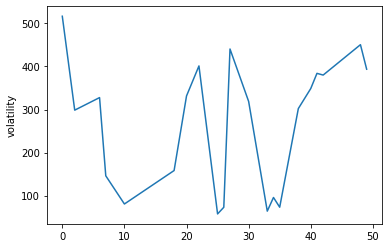

In [14]:
# Visulaizing the volatile nature. This can further be combined with the original dataset to draw more insights

dff_vol = dff['volatility'].dropna()
sns.lineplot(data = dff_vol)

## Visualizations

<AxesSubplot:xlabel='Symbol', ylabel='Volume (lacs)'>

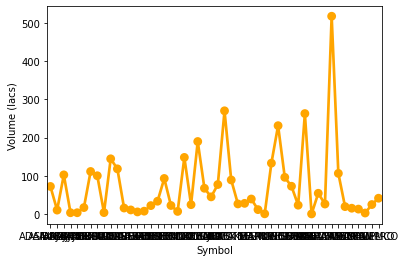

In [15]:
desc = df.describe()
sns.pointplot(x=df['Symbol'],y=df['Volume (lacs)'],data=desc,color='orange',alpha=0.8)

<AxesSubplot:xlabel='Symbol', ylabel='Chng'>

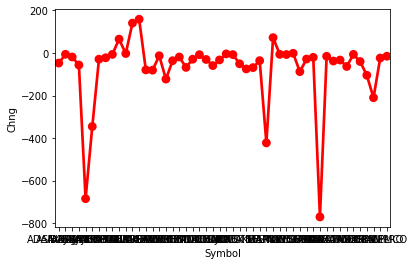

In [16]:
sns.pointplot(x=df['Symbol'],y=df['Chng'],data=desc,color='red',alpha=0.8)

<AxesSubplot:xlabel='Symbol', ylabel='30 d % chng'>

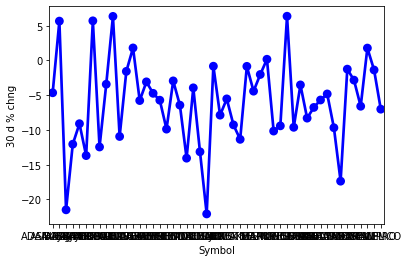

In [17]:
sns.pointplot(x=df['Symbol'],y=df['30 d % chng'],data=desc,color='blue',alpha=0.8)

<AxesSubplot:xlabel='Symbol', ylabel='365 d % chng'>

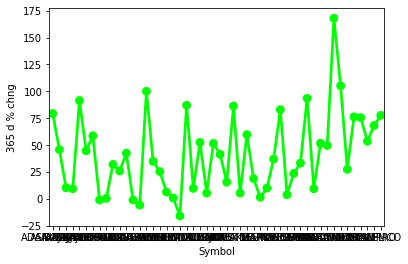

In [18]:
sns.pointplot(x=df['Symbol'],y=df['365 d % chng'],data=desc,color='lime',alpha=0.8)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     object 
 2   High             50 non-null     object 
 3   Low              50 non-null     object 
 4   LTP              50 non-null     object 
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     object 
 9   52w H            21 non-null     float64
 10  52w L            28 non-null     float64
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(7), object(6)
memory usage: 5.2+ KB


In [20]:
df.isna().any().sum()

2

## Distributions

Text(0.5, 1.0, 'Symbols where volume exceeds 100')

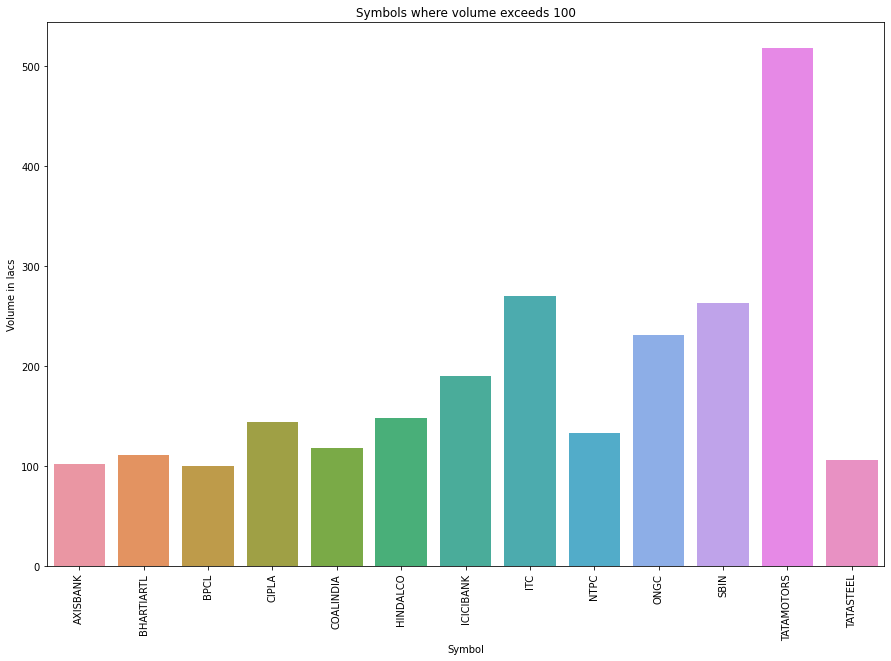

In [21]:
top_df = df[df['Volume (lacs)'] > 100]

plt.figure(figsize=(15,10))
sns.barplot(x=top_df['Symbol'], y=top_df['Volume (lacs)'])
plt.xticks(rotation= 90)
plt.xlabel('Symbol')
plt.ylabel('Volume in lacs')
plt.title("Symbols where volume exceeds 100")

In [22]:
df.isna().sum().any()

True

In [23]:
df.sort_values('Low').head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
15,HCLTECH,"1,120.00","1,126.00","1,103.30","1,111.65",-13.15,-1.17,22.07,246.06,NaN,814.35,34.79,-4.73
37,SBILIFE,"1,154.00","1,154.00","1,105.25","1,130.85",-28.65,-2.47,23.16,262.43,NaN,825.20,33.19,-3.52
43,TATASTEEL,"1,157.90","1,159.50","1,106.25","1,110.25",-63.40,-5.40,106.46,"1,200.79",NaN,539.50,105.13,-17.37
17,HDFCBANK,"1,500.00","1,506.70","1,485.00","1,489.50",-36.45,-2.39,93.12,"1,394.10",NaN,NaN,6.18,-9.88
45,TECHM,"1,544.00","1,550.00","1,510.15","1,519.00",-40.35,-2.59,15.22,232.97,NaN,846.70,76.17,-2.83


In [24]:
df.sort_values('High').head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
15,HCLTECH,"1,120.00","1,126.00","1,103.30","1,111.65",-13.15,-1.17,22.07,246.06,NaN,814.35,34.79,-4.73
37,SBILIFE,"1,154.00","1,154.00","1,105.25","1,130.85",-28.65,-2.47,23.16,262.43,NaN,825.20,33.19,-3.52
43,TATASTEEL,"1,157.90","1,159.50","1,106.25","1,110.25",-63.40,-5.40,106.46,"1,200.79",NaN,539.50,105.13,-17.37
17,HDFCBANK,"1,500.00","1,506.70","1,485.00","1,489.50",-36.45,-2.39,93.12,"1,394.10",NaN,NaN,6.18,-9.88
45,TECHM,"1,544.00","1,550.00","1,510.15","1,519.00",-40.35,-2.59,15.22,232.97,NaN,846.70,76.17,-2.83


In [25]:
df[df['365 d % chng'] > 50]

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901.00,384.40,79.22,-4.65
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,NaN,NaN,91.38,-9.10
6,BHARTIARTL,763,763,733.1,735.85,-29.30,-3.83,111.43,830.06,781.80,454.11,58.55,5.70
14,GRASIM,"1,757.30","1,757.85","1,679.00","1,685.80",-80.95,-4.58,7.48,127.84,NaN,840.05,99.95,-3.08
20,HINDALCO,441.8,442.7,414.7,417.7,-29.35,-6.57,148.26,631.93,551.85,220.35,86.93,-14.06
22,ICICIBANK,739,742.05,718.6,720.45,-30.60,-4.07,189.88,"1,385.86",867.00,465.80,52.41,-13.14
24,INFY,"1,702.55","1,718.35","1,684.00","1,689.55",-32.85,-1.91,44.94,764.67,NaN,NaN,51.44,-0.83
27,JSWSTEEL,668.25,672.55,624.25,630,-50.90,-7.48,89.22,574.61,776.50,336.00,86.25,-9.27
29,LT,"1,820.00","1,841.75","1,768.60","1,781.00",-68.90,-3.72,27.97,502.81,NaN,NaN,59.59,-0.85
34,ONGC,152.25,152.25,146.25,147.75,-7.35,-4.74,231.36,344.33,172.75,77.05,82.86,-9.41


In [26]:
df[df['% Chng'] > 1]

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
9,CIPLA,892,976.05,890.65,965,65.05,7.23,144.59,"1,380.90",NaN,726.5,31.89,6.34
11,DIVISLAB,"4,770.00","5,077.70","4,756.75","4,940.00",140.20,2.92,15.71,775.37,NaN,NaN,42.39,-1.57
12,DRREDDY,"4,580.00","4,820.00","4,576.15","4,750.00",158.40,3.45,10.72,508.97,NaN,NaN,-1.17,1.80


In [27]:
df.sort_values('% Chng').head(10)

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
27,JSWSTEEL,668.25,672.55,624.25,630,-50.90,-7.48,89.22,574.61,776.50,336.00,86.25,-9.27
42,TATAMOTORS,486,486.75,458,459.4,-33.35,-6.77,517.88,"2,430.36",536.70,156.70,167.95,-9.68
20,HINDALCO,441.8,442.7,414.7,417.7,-29.35,-6.57,148.26,631.93,551.85,220.35,86.93,-14.06
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901.00,384.40,79.22,-4.65
23,INDUSINDBK,951,956.95,898,899.95,-59.35,-6.19,67.46,622.74,NaN,789.00,5.25,-22.08
7,BPCL,397.15,397.2,375,377.4,-22.70,-5.67,100.23,383.54,503.00,357.00,-1.22,-12.45
31,MARUTI,"7,520.00","7,520.00","7,130.00","7,150.00",-422.50,-5.58,11.55,840.81,NaN,NaN,1.34,-2.02
43,TATASTEEL,"1,157.90","1,159.50","1,106.25","1,110.25",-63.40,-5.40,106.46,"1,200.79",NaN,539.50,105.13,-17.37
5,BAJFINANCE,"7,021.00","7,047.90","6,775.00","6,780.00",-345.80,-4.85,16.89,"1,161.63",NaN,NaN,44.57,-13.69
33,NTPC,133.2,134.05,128,128.65,-6.55,-4.84,133.24,173.94,152.10,88.15,36.93,-10.16


In [28]:
df.sort_values('30 d % chng').head(10)

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
23,INDUSINDBK,951,956.95,898,899.95,-59.35,-6.19,67.46,622.74,NaN,789.00,5.25,-22.08
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.90,568.40,10.19,-21.49
43,TATASTEEL,"1,157.90","1,159.50","1,106.25","1,110.25",-63.40,-5.40,106.46,"1,200.79",NaN,539.50,105.13,-17.37
20,HINDALCO,441.8,442.7,414.7,417.7,-29.35,-6.57,148.26,631.93,551.85,220.35,86.93,-14.06
5,BAJFINANCE,"7,021.00","7,047.90","6,775.00","6,780.00",-345.80,-4.85,16.89,"1,161.63",NaN,NaN,44.57,-13.69
22,ICICIBANK,739,742.05,718.6,720.45,-30.60,-4.07,189.88,"1,385.86",867.00,465.80,52.41,-13.14
7,BPCL,397.15,397.2,375,377.4,-22.70,-5.67,100.23,383.54,503.00,357.00,-1.22,-12.45
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,NaN,NaN,9.30,-12.05
28,KOTAKBANK,"2,002.00","2,007.00","1,955.10","1,960.00",-75.10,-3.69,26.48,522.52,NaN,NaN,5.24,-11.35
10,COALINDIA,157.75,159.4,155.35,155.9,-2.65,-1.67,118.30,185.5,203.80,123.25,25.78,-10.94


In [29]:
df.sort_values('365 d % chng').head(10)

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
19,HEROMOTOCO,"2,580.00","2,589.70","2,505.15","2,526.80",-67.90,-2.62,6.85,174.04,NaN,NaN,-16.02,-6.43
13,EICHERMOT,"2,495.00","2,506.10","2,421.50","2,440.75",-79.65,-3.16,5.55,136.56,NaN,NaN,-5.95,-5.77
7,BPCL,397.15,397.2,375,377.4,-22.70,-5.67,100.23,383.54,503.00,357.00,-1.22,-12.45
12,DRREDDY,"4,580.00","4,820.00","4,576.15","4,750.00",158.40,3.45,10.72,508.97,NaN,NaN,-1.17,1.80
8,BRITANNIA,"3,560.00","3,635.10","3,533.95","3,566.60",-6.80,-0.19,3.73,133.23,NaN,NaN,0.30,-3.42
18,HDFCLIFE,685,689,667.1,669.75,-19.05,-2.77,22.37,151.4,775.65,617.40,0.70,-2.94
31,MARUTI,"7,520.00","7,520.00","7,130.00","7,150.00",-422.50,-5.58,11.55,840.81,NaN,NaN,1.34,-2.02
35,POWERGRID,204.05,204.95,200.8,202.5,-1.75,-0.86,96.11,195.09,209.95,136.88,3.69,6.36
28,KOTAKBANK,"2,002.00","2,007.00","1,955.10","1,960.00",-75.10,-3.69,26.48,522.52,NaN,NaN,5.24,-11.35
23,INDUSINDBK,951,956.95,898,899.95,-59.35,-6.19,67.46,622.74,NaN,789.00,5.25,-22.08


In [30]:
df.sort_values('52w H').head(10)

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
25,IOC,125.6,125.6,120.5,121.15,-4.50,-3.58,77.25,94.57,141.50,84.00,41.28,-7.87
33,NTPC,133.2,134.05,128,128.65,-6.55,-4.84,133.24,173.94,152.10,88.15,36.93,-10.16
34,ONGC,152.25,152.25,146.25,147.75,-7.35,-4.74,231.36,344.33,172.75,77.05,82.86,-9.41
10,COALINDIA,157.75,159.4,155.35,155.9,-2.65,-1.67,118.30,185.5,203.80,123.25,25.78,-10.94
35,POWERGRID,204.05,204.95,200.8,202.5,-1.75,-0.86,96.11,195.09,209.95,136.88,3.69,6.36
26,ITC,228.9,230.05,223.1,223.6,-7.70,-3.33,270.27,610.54,265.30,192.40,15.35,-5.53
7,BPCL,397.15,397.2,375,377.4,-22.70,-5.67,100.23,383.54,503.00,357.00,-1.22,-12.45
42,TATAMOTORS,486,486.75,458,459.4,-33.35,-6.77,517.88,"2,430.36",536.70,156.70,167.95,-9.68
38,SBIN,486.25,487.9,467.1,470,-20.55,-4.19,263.06,"1,249.55",542.30,240.15,93.42,-8.30
20,HINDALCO,441.8,442.7,414.7,417.7,-29.35,-6.57,148.26,631.93,551.85,220.35,86.93,-14.06


In [31]:
df.sort_values('52w L').head(10)

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
34,ONGC,152.25,152.25,146.25,147.75,-7.35,-4.74,231.36,344.33,172.75,77.05,82.86,-9.41
25,IOC,125.6,125.6,120.5,121.15,-4.50,-3.58,77.25,94.57,141.50,84.00,41.28,-7.87
33,NTPC,133.2,134.05,128,128.65,-6.55,-4.84,133.24,173.94,152.10,88.15,36.93,-10.16
10,COALINDIA,157.75,159.4,155.35,155.9,-2.65,-1.67,118.30,185.5,203.80,123.25,25.78,-10.94
35,POWERGRID,204.05,204.95,200.8,202.5,-1.75,-0.86,96.11,195.09,209.95,136.88,3.69,6.36
42,TATAMOTORS,486,486.75,458,459.4,-33.35,-6.77,517.88,"2,430.36",536.70,156.70,167.95,-9.68
26,ITC,228.9,230.05,223.1,223.6,-7.70,-3.33,270.27,610.54,265.30,192.40,15.35,-5.53
20,HINDALCO,441.8,442.7,414.7,417.7,-29.35,-6.57,148.26,631.93,551.85,220.35,86.93,-14.06
38,SBIN,486.25,487.9,467.1,470,-20.55,-4.19,263.06,"1,249.55",542.30,240.15,93.42,-8.30
27,JSWSTEEL,668.25,672.55,624.25,630,-50.90,-7.48,89.22,574.61,776.50,336.00,86.25,-9.27


In [32]:
df.sort_values('Turnover (crs.)').head(10)

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
5,BAJFINANCE,"7,021.00","7,047.90","6,775.00","6,780.00",-345.80,-4.85,16.89,"1,161.63",NaN,NaN,44.57,-13.69
43,TATASTEEL,"1,157.90","1,159.50","1,106.25","1,110.25",-63.40,-5.40,106.46,"1,200.79",NaN,539.50,105.13,-17.37
38,SBIN,486.25,487.9,467.1,470,-20.55,-4.19,263.06,"1,249.55",542.3,240.15,93.42,-8.30
9,CIPLA,892,976.05,890.65,965,65.05,7.23,144.59,"1,380.90",NaN,726.50,31.89,6.34
22,ICICIBANK,739,742.05,718.6,720.45,-30.60,-4.07,189.88,"1,385.86",867.0,465.80,52.41,-13.14
17,HDFCBANK,"1,500.00","1,506.70","1,485.00","1,489.50",-36.45,-2.39,93.12,"1,394.10",NaN,NaN,6.18,-9.88
36,RELIANCE,"2,467.80","2,477.60","2,401.50","2,405.10",-87.85,-3.52,72.75,"1,770.19",NaN,NaN,23.48,-9.62
32,NESTLEIND,"19,148.85","19,434.10","18,982.50","19,250.00",71.95,0.38,0.56,108.61,NaN,NaN,9.87,0.17
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,NaN,NaN,9.30,-12.05
14,GRASIM,"1,757.30","1,757.85","1,679.00","1,685.80",-80.95,-4.58,7.48,127.84,NaN,840.05,99.95,-3.08


In [33]:
df.sort_values('Turnover (crs.)').tail()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
11,DIVISLAB,"4,770.00","5,077.70","4,756.75","4,940.00",140.20,2.92,15.71,775.37,NaN,NaN,42.39,-1.57
6,BHARTIARTL,763,763,733.1,735.85,-29.30,-3.83,111.43,830.06,781.8,454.11,58.55,5.70
31,MARUTI,"7,520.00","7,520.00","7,130.00","7,150.00",-422.50,-5.58,11.55,840.81,NaN,NaN,1.34,-2.02
16,HDFC,"2,820.35","2,856.00","2,723.00","2,745.00",-122.75,-4.28,33.53,927.88,NaN,NaN,25.27,-5.72
25,IOC,125.6,125.6,120.5,121.15,-4.50,-3.58,77.25,94.57,141.5,84.00,41.28,-7.87
